In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'TRAINU'
valid_path = 'TESTU'





In [2]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False 

In [3]:
# useful for getting number of classes
folders = glob('TRAINU/*')
folders

['TRAINU\\despierto', 'TRAINU\\dormido']

In [4]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('TRAINU',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('TESTU',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 21903 images belonging to 2 classes.
Found 5477 images belonging to 2 classes.


In [7]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
685/685 [==============================] - 333s 486ms/step - loss: 0.5296 - accuracy: 0.7593 - val_loss: 0.4031 - val_accuracy: 0.8178
Epoch 2/50
685/685 [==============================] - 332s 484ms/step - loss: 0.4358 - accuracy: 0.8121 - val_loss: 0.3916 - val_accuracy: 0.8454
Epoch 3/50
685/685 [==============================] - 333s 485ms/step - loss: 0.3978 - accuracy: 0.8288 - val_loss: 0.3786 - val_accuracy: 0.8251
Epoch 4/50
685/685 [==============================] - 332s 485ms/step - loss: 0.3791 - accuracy: 0.8412 - val_loss: 0.3682 - val_accuracy: 0.8342
Epoch 5/50
685/685 [==============================] - 332s 484ms/step - loss: 0.3458 - accuracy: 0.8602 - val_loss: 0.3241 - val_accuracy: 0.8769
Epoch 6/50
685/685 [==============================] - 332s 485ms/step - loss: 0.3638 - accuracy: 0.8513 - val_loss: 0.4748 - val_accuracy: 0.8386
Epoch 7/50
685/685 [============================

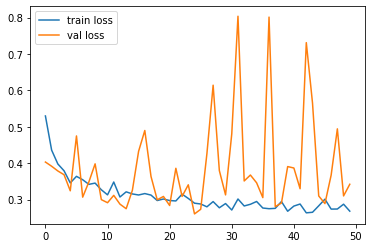

<Figure size 432x288 with 0 Axes>

In [8]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

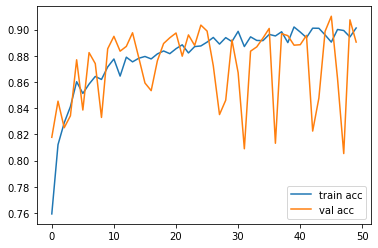

<Figure size 432x288 with 0 Axes>

In [9]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('vgg16-5epochs.h5')